In [258]:
import numpy as np
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [325]:
# Data in one dimension
df = pd.read_csv('ex1data1.txt', names=['X', 'y'])

Text(0.5, 1.0, 'Profit Vs. Population')

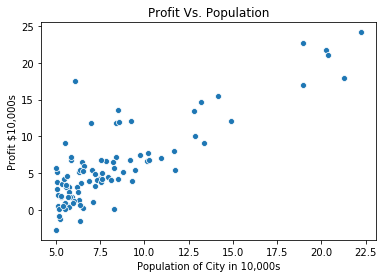

In [326]:
sns.scatterplot(df['X'],df['y'])
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit $10,000s")
plt.title("Profit Vs. Population")

In [1003]:
def featureNormalization(X):
    
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std


class LinearRegression_lm:
    def __init__(self, iters, alpha, normalize=False):
        
        self.iters = iters
        self.alpha = alpha
        self.J_history = []
        self.normalize = normalize
          
    def fit(self, X, y):
        
        try:
            self.m = X.shape[1]
            self.n = X.shape[0]
        except:
            self.m = 1
            self.n = len(y)

        if self.normalize == True:
            X, _, _ = featureNormalization(np.array(X))
        else:
            X = np.array(X)
            
            
        X = np.array(X).reshape(self.n, self.m)
        X0 = np.ones((self.n, 1))
        self.X = np.hstack((X0, X))
        self.y = np.array(y).reshape(self.n, 1)
    
        self.theta = np.zeros((self.m+1,1))
        
        for i in range(self.iters): 
            self.gradientDescent()
            objective = self.computeCost()
            self.J_history.append(objective)
            
    def computeCost(self):
        
        y_hat = self.X.dot(self.theta) # evaluate
        square_err = (y_hat - self.y)**2
        return 1/(2*self.m)*np.sum(square_err)
    
    def gradientDescent(self):
        
        preds = self.X.dot(self.theta)
        errors = np.dot(self.X.transpose(), (preds - self.y))
        self.theta -= self.alpha * 1/(self.n) * errors
        
    def pred(self, X):
        
        n = 1
        try:
            X = np.array(X).reshape(n, self.m)
            X0 = np.ones((n,1))
        
        except:
            X = np.array(X).reshape(self.n, self.m)
            X0 = np.ones((self.n,1))

        
        X = np.hstack((X0, X))
        return X.dot(self.theta)
  

In [1006]:
lr_lm = LinearRegression_lm(1500, 0.01)
lr_lm.fit(df['X'], df['y'])

print('theta:', lr_lm.theta)
print('r2:', r2_score(df['y'], df['pred']))

theta: [[-3.63029144]
 [ 1.16636235]]
r2: 0.7016044731117159


# sklearn comparison

In [1002]:
lr = LinearRegression()

X = np.array(df['X']).reshape(len(df['X']), 1)
y = np.array(df['y']).reshape(len(df['y']), 1)
lr.fit(X, y)

print('intercept:', lr.intercept_[0])
print('coef:', lr.coef_[0][0])

df['pred2'] = lr.predict(X)
print('r2 score:', r2_score(df['y'], df['pred2']))


intercept: -3.89578087831185
coef: 1.1930336441895935
r2 score: 0.7020315537841397


### Predictions

In [1008]:
print('3.5=', lr_lm.pred([3.5]))
print('7=', lr_lm.pred([7]))

3.5= [[0.45197679]]
7= [[4.53424501]]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

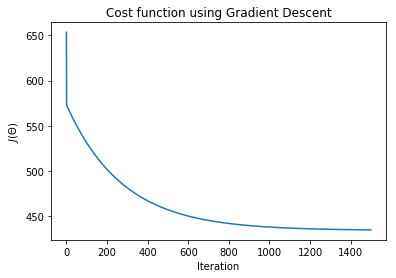

In [1009]:
sns.lineplot(range(len(lr_lm.J_history)), lr_lm.J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

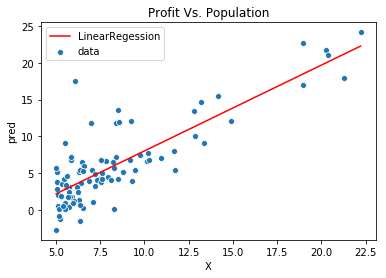

In [1011]:
sns.scatterplot(df['X'],df['y'], label='data')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit $10,000s")
plt.title("Profit Vs. Population")

df['pred'] = lr_lm.pred(df['X'])
sns.lineplot(df['X'], df['pred'], color='red', label='LinearRegession')

In [1012]:
df.head()

,X,y,pred,pred2
0,6.1101,17.5920,3.496299,3.393774
1,5.5277,9.1302,2.817010,2.698951
2,8.5186,13.6620,6.305483,6.267196
3,7.0032,11.8540,4.537977,4.459272
4,5.8598,6.8233,3.204359,3.095158


In [1013]:
df2 = pd.read_csv('ex1data2.txt', names=['1', '2', '3'])

In [1015]:
lr2 = LinearRegression_lm(400, 0.01, normalize=True)
lr2.fit(df2[['1', '2']], df2['3'])

Text(0.5, 1.0, 'Cost function using Gradient Descent')

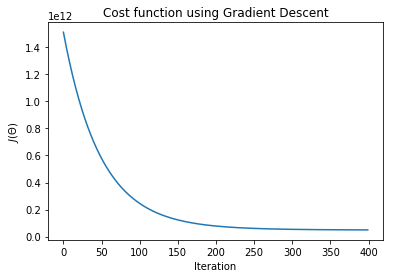

In [1016]:
sns.lineplot(range(len(lr2.J_history)), lr2.J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")


In [1017]:
lr2.theta

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

In [1018]:
x_sample, _, _ = featureNormalization(np.array([1650,3]))
predict3=lr2.pred(x_sample)
print(round(predict3[0][0],1))

430446.5
